In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [31]:
df = pd.read_csv('./Dataset/Ads_CTR_Optimisation.csv')
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [36]:
N = 10000
d = 10
ads_selected = []
num_of_selections = [0] * d
sum_of_rewards = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if num_of_selections[i] > 0:
            avg_reward = sum_of_rewards[i] / num_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / num_of_selections[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    num_of_selections[ad] = num_of_selections[ad] + 1
    reward = df.values[n, ad]
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward
    total_reward = total_reward + reward

Text(0.5, 1.0, 'Histogram of ads selections')

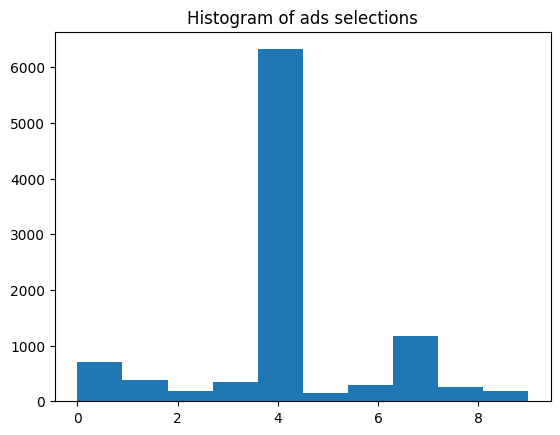

In [37]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')